In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot learning curve

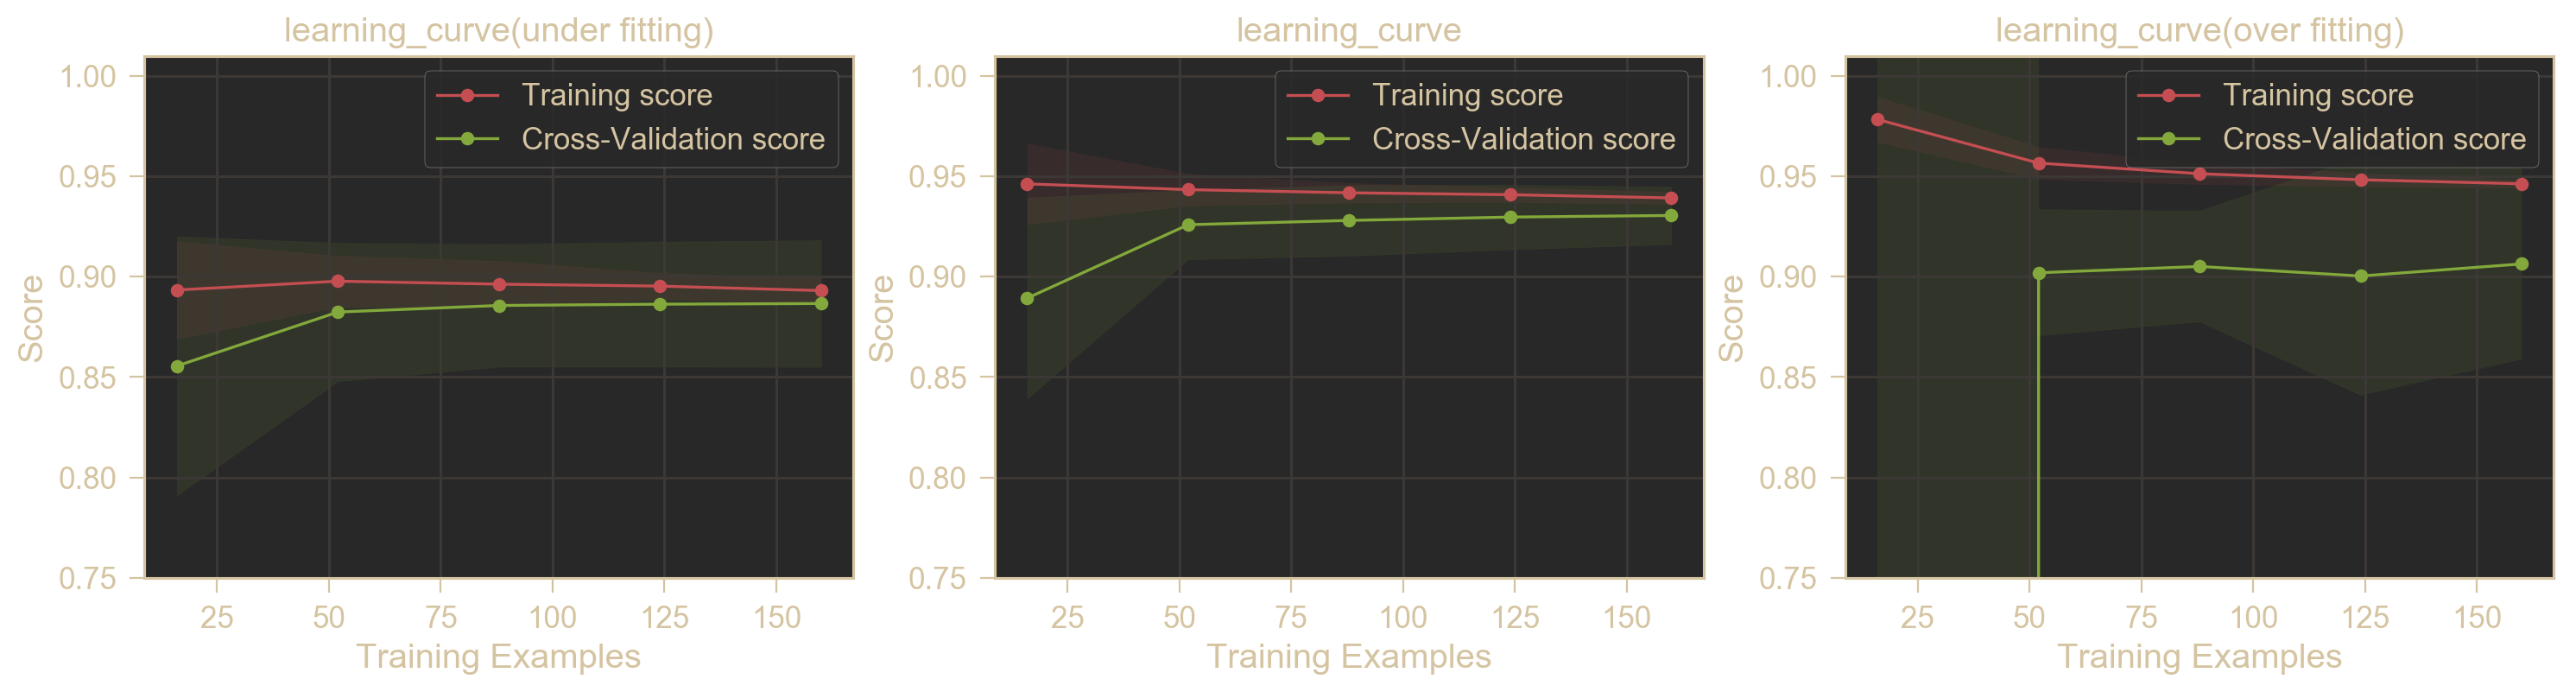

In [3]:
#学习曲线------------
n_dots = 200
X = np.linspace(0,1,n_dots)
y = np.sqrt(X) + 0.2*np.random.rand(n_dots) - 0.1
X = X.reshape(-1,1)
y = y.reshape(-1,1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_model(degree=1): #degree为多项式阶数
	polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
	linear_regression = LinearRegression()
	pipeline = Pipeline([('polynomial_features',polynomial_features),\
						('linear_regression',linear_regression)])
	return pipeline

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,\
						n_jobs=1,train_sizes=np.linspace(0.1,1.0, 5)):
	plt.title(title)
	if ylim is not None:
		plt.ylim(*ylim)
	plt.xlabel('Training Examples')
	plt.ylabel('Score')
	train_sizes,train_scores,test_scores = learning_curve(estimator, X, y,\
									cv=cv,n_jobs=n_jobs,train_sizes=train_sizes) # key step
	train_scores_mean = np.mean(train_scores,axis=1)
	train_scores_std = np.std(train_scores,axis=1)
	test_scores_mean = np.mean(test_scores,axis=1)
	test_scores_std = np.std(test_scores,axis=1)
	plt.grid()
	plt.fill_between(train_sizes,train_scores_mean-train_scores_std,\
					train_scores_mean+train_scores_std,alpha=0.1,color='r')
	plt.fill_between(train_sizes,test_scores_mean-test_scores_std,\
					test_scores_mean+test_scores_std,alpha=0.1,color='g')
	plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
	plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross-Validation score')
	plt.legend(loc='best')
	return plt

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
titles = ['learning_curve(under fitting)','learning_curve','learning_curve(over fitting)']
degrees = [1,3,10]
plt.figure(figsize=(18,4),dpi=200)
for i in range(len(degrees)):
	plt.subplot(1,len(degrees),i+1)
	plot_learning_curve(polynomial_model(degrees[i]),titles[i],X,y,ylim=(0.75,1.01),cv=cv)
plt.show()

# KNN

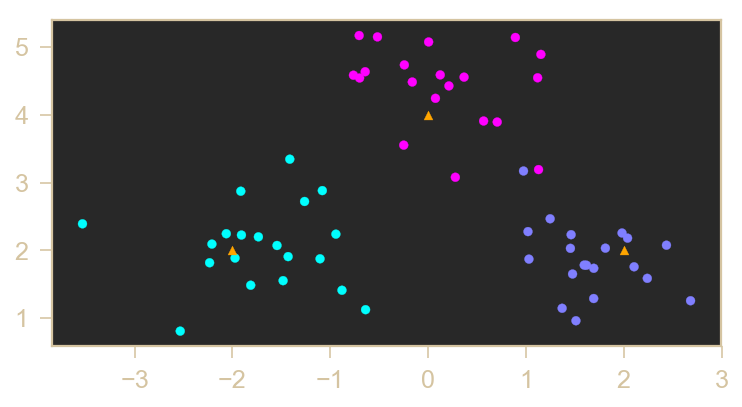

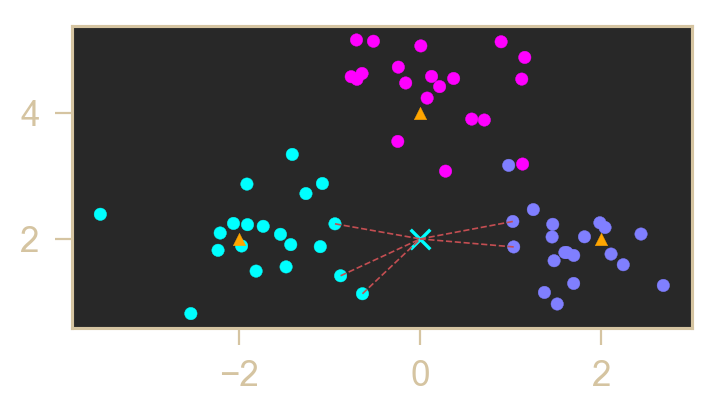

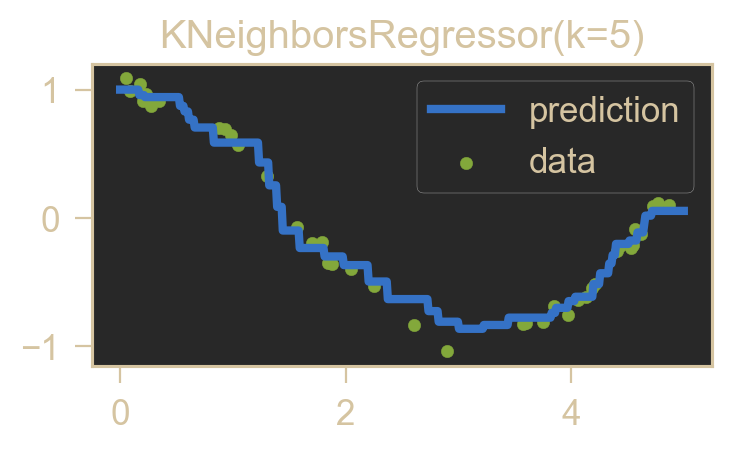

In [4]:
#K近邻分类---------------
from sklearn.datasets.samples_generator import make_blobs
centers = [[-2,2],[2,2],[0,4]]
#生成60个在以centers为中心点的周围分布的数据集,数据点分布的松散度为0.6标准差。
X,y=make_blobs(n_samples=60,centers=centers,random_state=0,cluster_std=0.60)
plt.figure(figsize=(6,3),dpi=144)
c = np.array(centers)
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='cool')
plt.scatter(c[:,0],c[:,1],s=20,marker='^',c='orange')

from sklearn.neighbors import KNeighborsClassifier
k=5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)
X_sample = np.array([[0,2]])
y_sample = clf.predict(X_sample)
neighbors = clf.kneighbors(X_sample,return_distance=False)#将样本周围距离最近的5个点取出来，取出来的点是训练集里的索引
plt.figure(figsize=(4,2),dpi=200)
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='cool')
plt.scatter(c[:,0],c[:,1],s=20,marker='^',c='orange')
plt.scatter(X_sample[:,0],X_sample[:,1],marker='x',c=y_sample,s=50,cmap='cool')
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],'r--',linewidth=0.6)

#K近邻回归--------------
n_dots =40
X=5*np.random.rand(n_dots,1)
y = np.cos(X).ravel()
y+=0.2*np.random.rand(n_dots)-0.1 #添加噪声

from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(k)
knn.fit(X,y)
T = np.linspace(0,5,500)[:,np.newaxis]
y_pred = knn.predict(T)
knn.score(X,y)

plt.figure(figsize=(4,2),dpi=200)
plt.scatter(X,y,c='g',label='data',s=20)
plt.plot(T,y_pred,c='b',label='prediction',lw=3)
plt.legend(loc='upper right')
plt.axis('tight')
plt.title('KNeighborsRegressor(k=%i)'%k)
plt.show()

# Linear Regression

elaspe:0.001638;
train_score:0.723941;
cv_score:0.794958
degree:1;------
  elaspe:0.003633;
  train_score:0.723941;
  cv_score:0.794958;
  mse:23.411133
degree:2;------
  elaspe:0.011064;
  train_score:0.930547;
  cv_score:0.860465;
  mse:5.889960
degree:3;------
  elaspe:0.054630;
  train_score:1.000000;
  cv_score:-106.388458;
  mse:0.000000


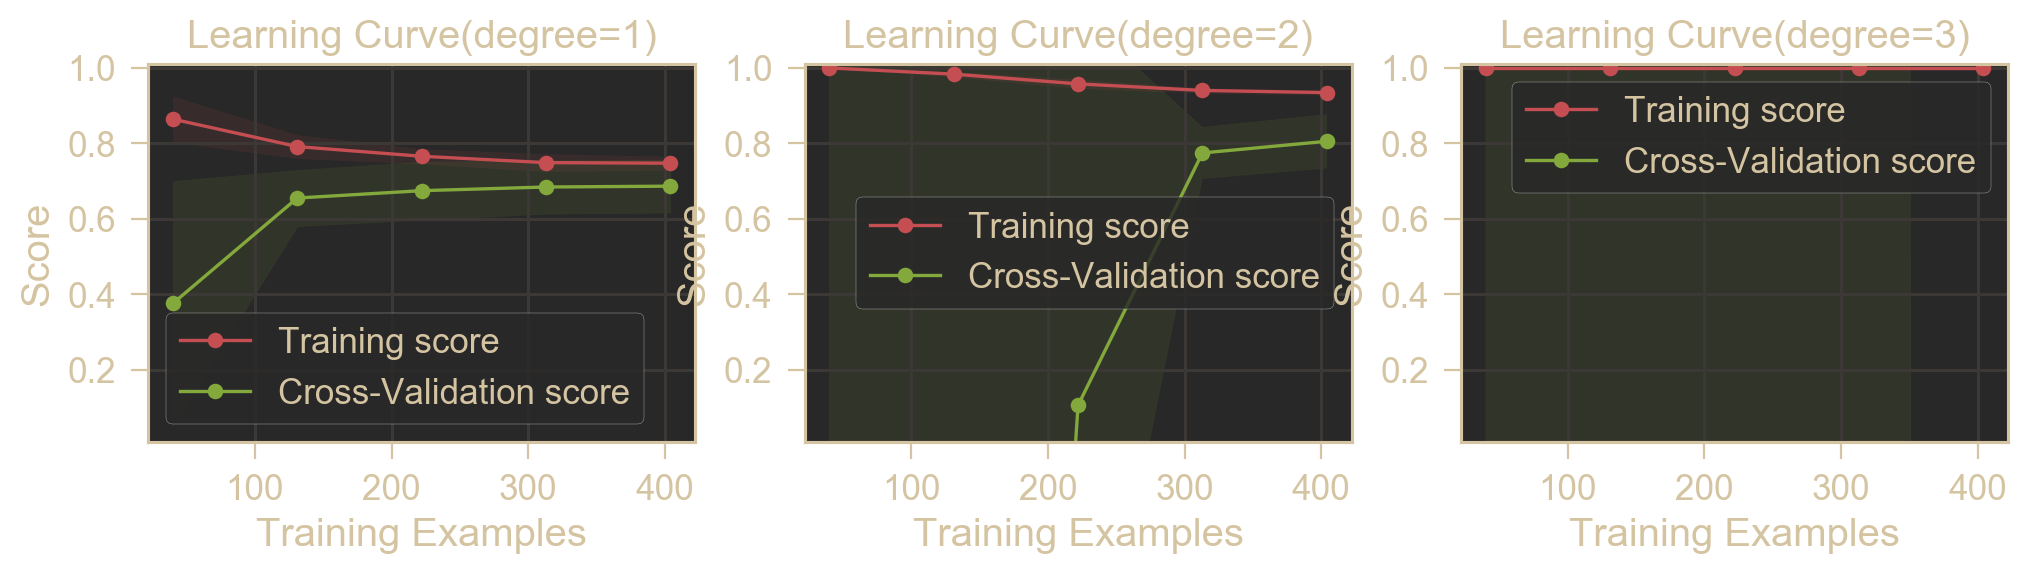

In [5]:
#线性回归算法---------
#获取波士顿房价数据
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
#模型训练
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
model = LinearRegression(normalize=True) #normalize=Ture数据归一化
start = time.clock()
model.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
cv_score = model.score(X_test,y_test)
print('elaspe:%.6f;\ntrain_score:%0.6f;\ncv_score:%.6f'%(time.clock()-start,train_score,cv_score))

#模型优化-欠拟合-增加模型复杂度-创建多项式模型函数
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
    return pipeline
degrees = [1,2,3]
results = []
for deg in degrees:
    model = polynomial_model(deg)
    start = time.clock()
    model.fit(X_train,y_train)
    train_score = model.score(X_train,y_train)
    cv_score = model.score(X_test,y_test)
    mse = mean_squared_error(y_train,model.predict(X_train))
    results.append({'degree':deg,'elapse':time.clock()-start,'train_score':train_score,'cv_score':cv_score,'mse':mse})
for r in results:
    print('degree:%i;------\n  elaspe:%.6f;\n  train_score:%0.6f;\n  cv_score:%.6f;\n  mse:%.6f'%\
          (r['degree'],r['elapse'],r['train_score'],r['cv_score'],r['mse']))
#画学习曲线
from matplotlib.figure import SubplotParams
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
plt.figure(figsize=(12,2.5),dpi=200,subplotpars=SubplotParams(hspace=0.3))
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(polynomial_model(degrees[i]),'Learning Curve(degree=%i)'%degrees[i],X,y,ylim=(0.01,1.01),cv=cv)

# Logistic Regression

train_score:0.962637,
test_score:0.929825
elaspe:0.165647;
train_score:0.997802;
test_score:0.982456
count of model parameters:495,
count of none-zero parameters:111


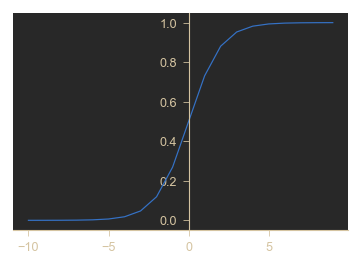

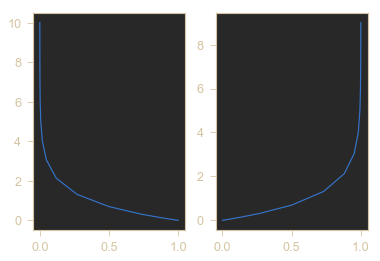

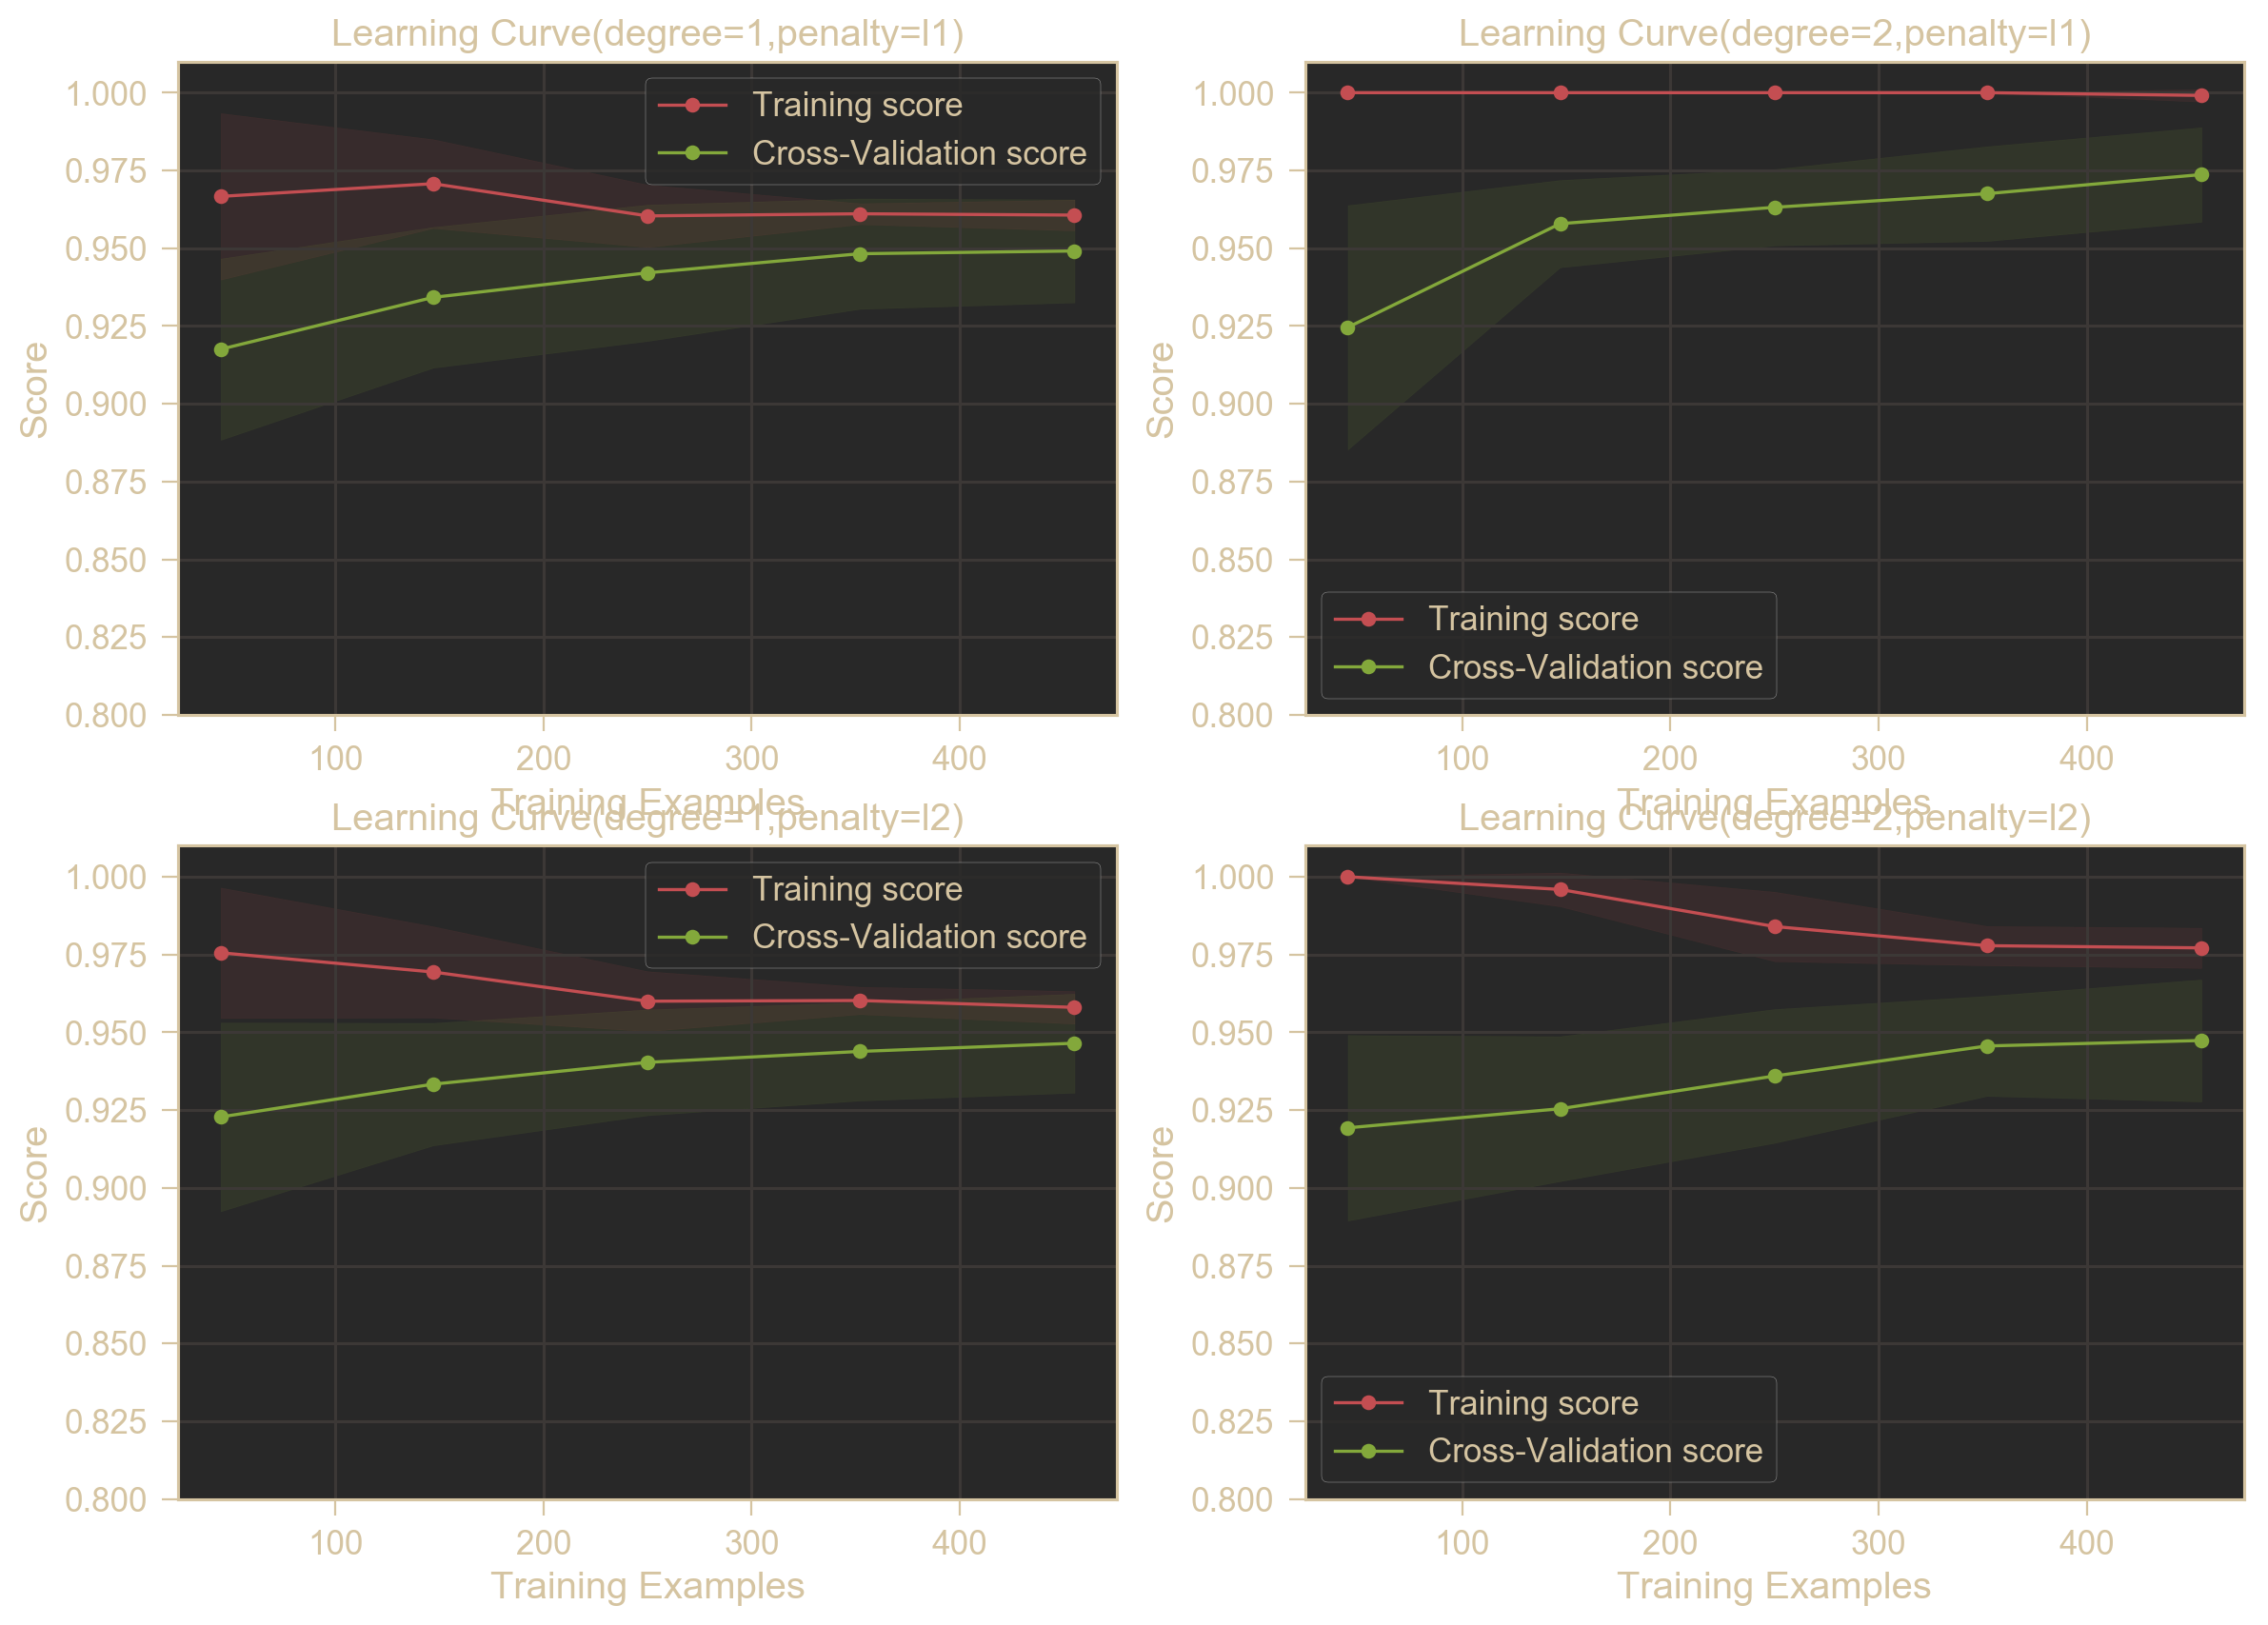

In [6]:
#逻辑回归算法-------------
#画logistic(sigmoid)函数
x = np.arange(-10,10,1)
def y(x):
    y = []
    for i in x:
        yi = 1/(1+np.exp(-i))
        y.append(yi)
    return y
y = y(x)
plt.plot(x,y)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
# ax.spines['bottom'].set_position(('data',0.5))
ax.xaxis.set_ticks_position('bottom')

#画成本函数
cost1 = -np.log(y)
cost0 = -np.log(1-np.array(y))
fig,axes = plt.subplots(1,2)
axes[0].plot(y,cost1)
axes[1].plot(y,cost0)
#penalty正则项的形式-L1、L2范数-以二维向量为例θ=[θ1,θ2]
# L1：||θ||1 = |θ1|+|θ2| --->θ稀疏化
# L2：||θ||2 = np.sqrt(θ1^2+θ2^2) -->θ都有小贡献

#案例---------
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
#模型训练
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model = LogisticRegression()
model.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('train_score:%.6f,\ntest_score:%.6f'%(train_score,test_score))
#模型预测概率
y_pred = model.predict(X_test)
len(y_pred[y_pred==y_test])
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[np.logical_and(y_pred_prob[:,0]>0.1,y_pred_prob[:,1]>0.1)]
#模型优化
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
def polynomial_model(degree=1,**kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([('polynomial_features',polynomial_features),('logistic_regression',logistic_regression)])
    return pipeline
import time
model = polynomial_model(degree=2,penalty='l1')
start = time.clock()
model.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print('elaspe:%.6f;\ntrain_score:%0.6f;\ntest_score:%.6f'%(time.clock()-start,train_score,test_score))
#查看使用L1范数稀疏化后有多少特征被舍弃
logistic_regression = model.named_steps['logistic_regression']
len(logistic_regression.coef_)
print('count of model parameters:%i,\ncount of none-zero parameters:%i'\
      %(len(logistic_regression.coef_[0]),np.count_nonzero(logistic_regression.coef_)))

#画学习曲线
def plot_learning_curve(estimator,X,y,title='Learning Curve',ylim=None,cv=None,\
						n_jobs=1,train_sizes=np.linspace(0.1,1.0, 5)):
	plt.title(title)
	if ylim is not None:
		plt.ylim(*ylim)
	plt.xlabel('Training Examples')
	plt.ylabel('Score')
	train_sizes,train_scores,test_scores = learning_curve(estimator, X, y,\
									cv=cv,n_jobs=n_jobs,train_sizes=train_sizes) # key step
	train_scores_mean = np.mean(train_scores,axis=1)
	train_scores_std = np.std(train_scores,axis=1)
	test_scores_mean = np.mean(test_scores,axis=1)
	test_scores_std = np.std(test_scores,axis=1)
	plt.grid()
	plt.fill_between(train_sizes,train_scores_mean-train_scores_std,\
					train_scores_mean+train_scores_std,alpha=0.1,color='r')
	plt.fill_between(train_sizes,test_scores_mean-test_scores_std,\
					test_scores_mean+test_scores_std,alpha=0.1,color='g')
	plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
	plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross-Validation score')
	plt.legend(loc='best')
	return plt
from sklearn.model_selection import ShuffleSplit,learning_curve
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
degrees = [1,2]
penalty = ['l1','l2']
plt.figure(figsize=(14,10),dpi=200)
c = 0
for l in range(len(penalty)):
    for i in range(len(degrees)):
        plt.subplot(2,len(degrees),c+i+1)
        plot_learning_curve(polynomial_model(degree=degrees[i],penalty=penalty[l]), X,y,\
                            title='Learning Curve(degree=%i,penalty=%s)'%(degrees[i],penalty[l]),\
                            ylim=(0.8,1.01),cv=cv)
    c += 2

# Decission Tree

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Text(0,0.5,'Gini Impurity')

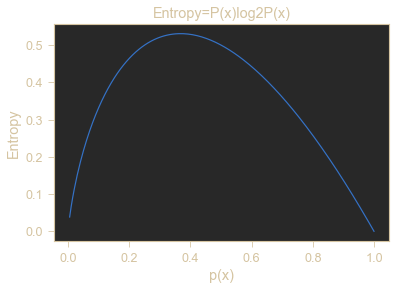

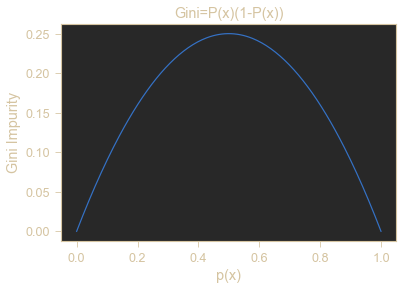

In [7]:
#决策树-----------
# 信息熵Entropy：H(X)=-ΣP(x)log2P(x) --值越大，不确定性越大，需要了解的信息越多
#画一个事件的熵图-->当p(x)越接近0或1时，信息熵的值越小,不确定性越小
p = np.linspace(0,1,200)
Entropy = -p*np.log2(p)
plt.figure()
plt.plot(p,Entropy)
plt.title('Entropy=P(x)log2P(x)')
plt.xlabel('p(x)')
plt.ylabel('Entropy')
#基尼不纯度Gini(X)=ΣP(x)(1-P(x))=1-ΣP(x)^2 -->衡量信息不纯度的指标,P(x)是样本属于x类别的概率。
#画一个类别的基尼不纯度图
p = np.linspace(0,1,200)
Gini = p*(1-p)
plt.figure()
plt.plot(p,Gini)
plt.title('Gini=P(x)(1-P(x))')
plt.xlabel('p(x)')
plt.ylabel('Gini Impurity')